<a href="https://colab.research.google.com/github/MinhDucBee1209/Bai-Tap-AI/blob/main/Final_Project_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

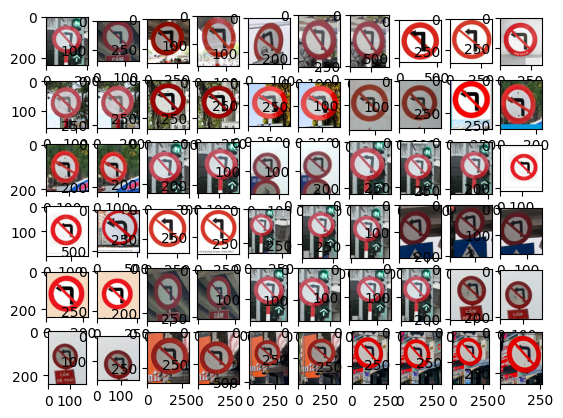

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import  to_categorical
from keras.utils import load_img, img_to_array

import matplotlib.pyplot as plt
from matplotlib.image import imread

from os import listdir

from numpy import asarray
from numpy import save
import numpy as np

folder = '/content/drive/MyDrive/6_Bien_Bao/'
for i in range(60):
  plt.subplot(6,10,i+1)
  filename = folder + 'Cam_re_phai('+str(i+1)+').png'
  img = imread(filename)
  plt.imshow(img)
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
folder = '/content/drive/MyDrive/6_Bien_Bao/'
photos, labels  = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Cam_re_trai'):
    output = 1.0
  if file.startswith('Cam_xe_tai'):
    output = 2.0
  if file.startswith('Tron_truot'):
    output = 3.0
  if file.startswith('Lan_oto'):
    output = 4.0
  if file.startswith('Max_50'):
    output = 5.0
  if file.startswith('Min_60'):
    output = 6.0

  img = load_img(folder+file,target_size=(120,120))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)

x_train = photos.reshape(360,120,120,3)
x_train = x_train.astype('float32')/255

y_train = to_categorical(labels,10)
print(x_train.shape)
print(y_train.shape)

(360, 120, 120, 3)
(360, 10)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 30, 30, 64)       

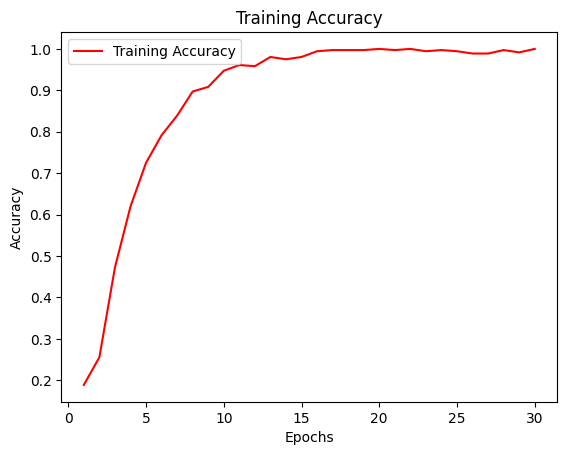

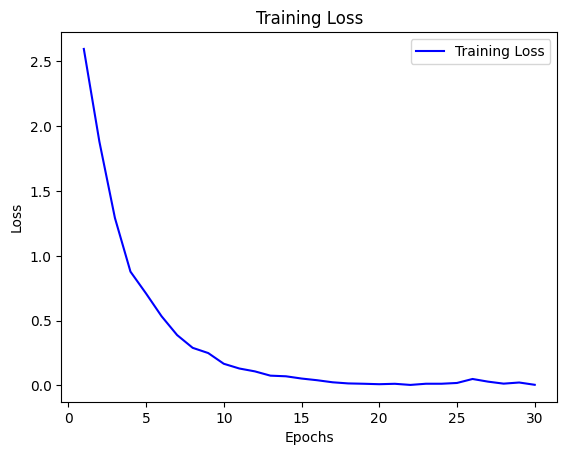

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

#32 lan tich chap
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(120,120,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))
#64 lan tich chap
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))
#128 lan tich chap
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
model.summary()
# Lưu các thông tin về độ chính xác và mất mát trong quá trình huấn luyện
history = model.fit(x_train, y_train, batch_size=64, epochs=30, verbose=1)
# Vẽ đồ thị độ chính xác và mất mát qua mỗi epoch
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
save_path = '/content/drive/MyDrive/'
model.save(save_path + '6_Bien_bao.h5')

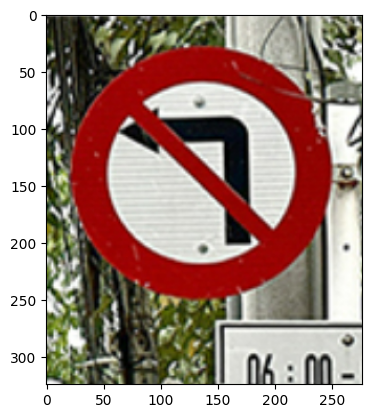

1/1 [==============================] - 0s 35ms/step


array([1])

In [13]:
img_url = '/content/Cam_re_phai_test.png'
img = plt.imread(img_url)
plt.imshow(img)
plt.show()

x_test=[]
img_test = load_img(img_url, target_size=(120,120))
img_test = img_to_array(img_test)
x_test.append(img_test)
x_test = asarray(x_test) 
#bien x_test dc cđ thành 1 matrix numpy: asarray
x_test = x_test.reshape(1,120,120,3)
x_test = x_test.astype('float32')/255

np.argmax(model.predict(x_test), axis = -1)
#img_to_array:Hàm này được sử dụng để chuyển đổi ảnh thành một ma trận numpy.